<a href="https://colab.research.google.com/github/attilalr/Pygeostat_in_colaboratory/blob/main/Exemple_pygeostat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Python script Pygeostat example in Colaboratory Google

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os, shutil, sys

try:
  import pygeostat as gs
except:
  !pip3 install pygeostat

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
work_folder = '/content/temp_folder'

The next cell will download the gslib executables and chmod +x all files in the executable folder.

In [3]:
gs.get_executable()
string_path_exec = os.popen('find /usr/local/lib -name \'kt3d\'|head -n1').read()
string_path_exec = '/'.join(string_path_exec.split('/')[:-1])+'/'
print ('Caminho dos executáveis: {}'.format(string_path_exec))

string_cmd = 'chmod +x '+string_path_exec+'*'
print ('Alterando permissão de execução: {}'.format(string_cmd))
os.system(string_cmd)

print ('Lista de arquivos na pasta de executáveis: {}'.format(os.listdir(string_path_exec)))

The software is available under gslib license agreement (http://www.gslib.com)
Caminho dos executáveis: /usr/local/lib/python3.7/dist-packages/pygeostat/executable/
Alterando permissão de execução: chmod +x /usr/local/lib/python3.7/dist-packages/pygeostat/executable/*
Lista de arquivos na pasta de executáveis: ['varmap', 'ik3d', 'gtsim', 'kt3d', 'cokb3d', 'addcoord', 'sisim_gs', 'probplt', 'plotem', 'draw', 'declus', 'kb2d', 'histplt', 'locmap', 'anneal', 'postik', 'histsmth', 'sasim', 'lusim', 'vmodel', 'scatsmth', 'pixelplt', 'nscore', 'bivplt', 'gamv', 'bicalib', 'pfsim', 'Info.txt', 'vargplt', 'trans', 'rotcoord', 'ellipsim', 'gam', 'sgsim', 'postsim', 'scatplt', 'bigaus', 'qpplt', 'backtr', 'sisim_lm', 'sisim']


Setting work folder.

In [4]:
try:
    os.mkdir(work_folder)
    print("Folder {} created.".format(work_folder)) 
except FileExistsError:
    print("Folder {} already exists.".format(work_folder)) 


Folder /content/temp_folder already exists.


In the next cell we are going to copy an example data to the work folder and open it.

In [5]:
example_datafile = 'point2d_surf'

# Vamos trabalhar com o arquivo de dados na pasta de trabalho
dfl = gs.ExampleData(example_datafile)
shutil.copy(dfl.flname, work_folder)
print ('Lista de arquivos em {}:'.format(work_folder))
os.listdir(work_folder)

dfl = gs.DataFile(flname=work_folder+'/'+example_datafile+'.dat')

datafile_name = example_datafile+'.dat'

Lista de arquivos em /content/temp_folder:


findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans.


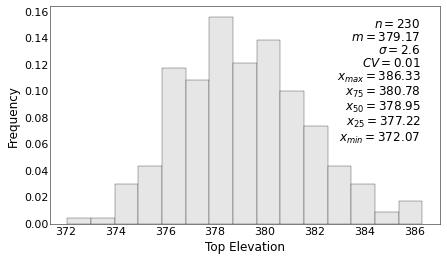

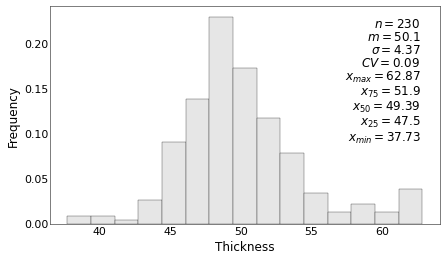

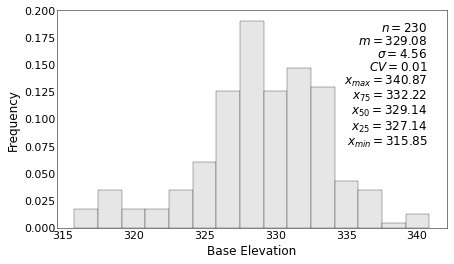

In [6]:
for var in dfl.variables:
    gs.histogram_plot(dfl, var=var, figsize = (7,4))

Now it is time to execute a gslib program. The first step is to define the procedure to get the blank parameters file.

In [7]:
program = 'nscore'
string_cmd = f'echo \'\'|{string_path_exec}{program}'
print (string_cmd)
print (os.popen(string_cmd).read())

print ()
print ('### Copy the parameter file content below ###')
!cat /content/nscore.par

echo ''|/usr/local/lib/python3.7/dist-packages/pygeostat/executable/nscore

 NSCORE Version: 3.000

 Which parameter file do you want to use?
  data file = ../data/cluster.dat                     
  columns =  3 5
  trimming limits =  -1.E+21 1.E+21
  consider a different ref. dist. (1=yes) =  0
  file with reference distribution = ../histsmth/histsmth.out -              
  columns =  1 2
  file for output = nscore.out                              
  file for transformation table = nscore.trn                              
 ERROR: ../data/cluster.dat                                                                                                                                                                                                                                                                                                                                                                                                                                                             

Now we copy from the last cell's output.

In [30]:
nscore_p = gs.Program(program = 'nscore')

# parstring fields to fill in

# input
datafile_name = os.path.join(work_folder, dfl.flname)

# parameters
tmin = gs.Parameters['data.tmin']

# nscore output filenames
nscore_outfl = os.path.join(work_folder, 'nscore.out')
trnfl = os.path.join(work_folder, 'nscore.trn')

parstr = f"""
                  Parameters for NSCORE
                  *********************

START OF PARAMETERS:
{datafile_name}      -file with data
6    0              -  columns for variable and weight
{tmin}   1.0e21         -  trimming limits
0                        -1=transform according to specified ref. dist.
nofile.out -  file with reference dist.
1   2                    -  columns for variable and weight
{nscore_outfl}               -file for output
{trnfl}               -file for output transformation table
"""

print (parstr)

nscore_p.run(parstr=parstr, quiet=False, liveoutput=True)

Unable to find the provided program! Trying to use the executable pool shipped with pygeostat!

                  Parameters for NSCORE
                  *********************

START OF PARAMETERS:
/content/temp_folder/point2d_surf.dat      -file with data
6    0              -  columns for variable and weight
-998.0   1.0e21         -  trimming limits
0                        -1=transform according to specified ref. dist.
nofile.out -  file with reference dist.
1   2                    -  columns for variable and weight
/content/temp_folder/nscore.out               -file for output
/content/temp_folder/nscore.trn               -file for output transformation table

Calling:  ['/usr/local/lib/python3.7/dist-packages/pygeostat/executable/nscore', 'temp']

 NSCORE Version: 3.000

  data file = /content/temp_folder/point2d_surf.dat   
  columns =  6 0
  trimming limits =  -998. 1.E+21
  consider a different ref. dist. (1=yes) =  0
  file with reference distribution = nofile.out -         

In [13]:
dfl_ns = gs.DataFile(nscore_outfl)
print (dfl_ns.flname)
dfl_ns.head()

/content/temp_folder/nscore.out


,HoleID,X,Y,Top Elevation,Thickness,Base Elevation,NS:Y
0,3.0,405.63,2135.75,376.69,47.98,328.71,1.31969
1,5.0,235.89,1865.70,379.69,51.00,328.69,0.39659
2,6.0,325.03,2055.81,376.86,49.34,327.52,0.98182
3,7.0,675.54,2195.25,381.49,48.75,332.74,1.64539
4,8.0,355.73,1995.74,376.97,48.94,328.03,0.80371


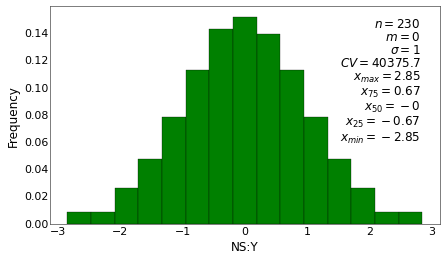

In [11]:
for var in dfl_ns.variables:
    if 'ns' in var.lower():
        gs.histogram_plot(dfl_ns, var=var, color='g', figsize = (7,4))